# Import Libraries

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# import warning
import warnings
warnings.filterwarnings('ignore')

# Set option max columns display
pd.set_option('max_columns', 150)

# Dataset Overview

In [54]:
df = pd.read_csv('hotel_bookings_data.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [3]:
df.shape

(119390, 29)

In [5]:
df.isnull().sum()/len(df)*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_weekdays_nights           0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
city                               0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
booking_changes                    0.000000
deposit_type                       0.000000
agent                             13.686238
company                         

In [6]:
df.duplicated().sum()

33261

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_weekdays_nights            35
adults                              14
children                             5
babies                               5
meal                                 5
city                               177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list               128
customer_type                        4
adr                      

# Exploratory Data Analysis

In [3]:
eda = df.copy()

num = df.select_dtypes(include='number').columns
cat = df.select_dtypes(include='object').columns

## Univariate Analysis

In [11]:
len(num)

20

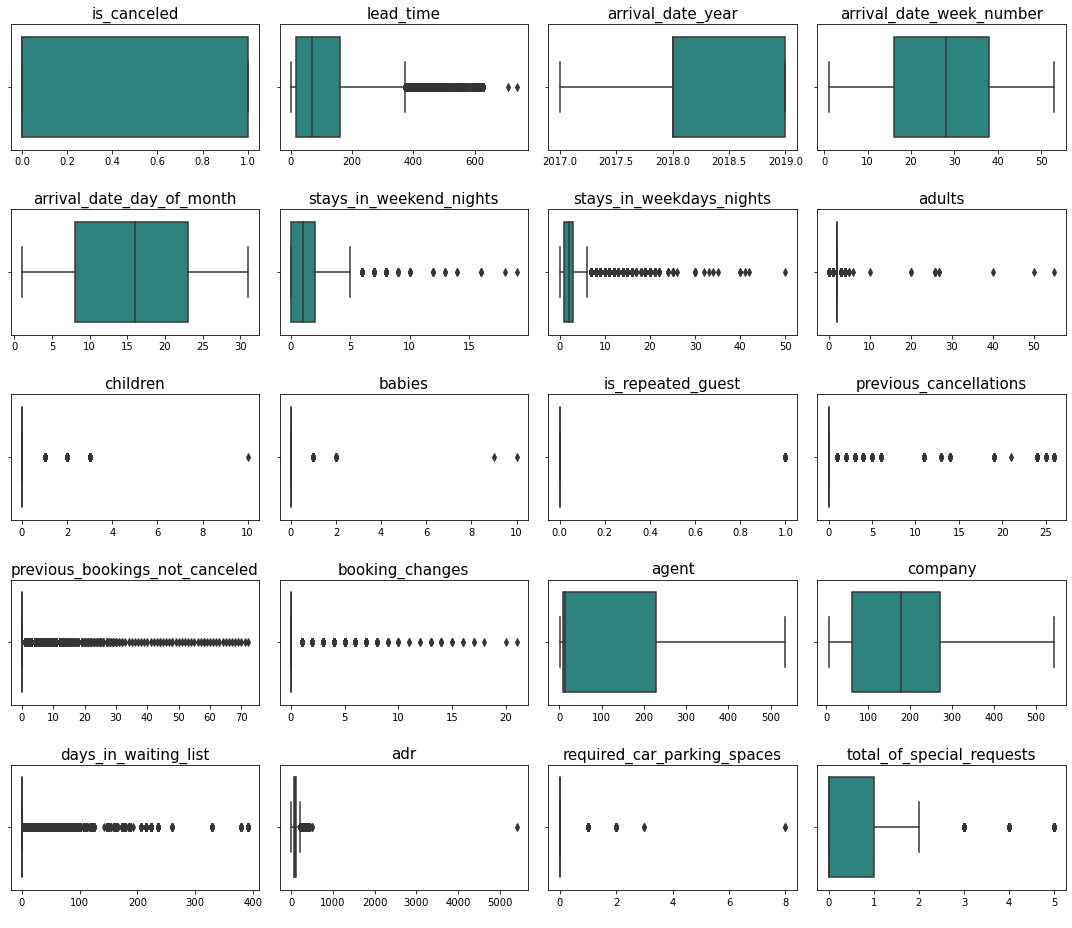

In [8]:
plt.figure(figsize=(15,13))
for i in range(0, len(num)):
    plt.subplot(5,4,i+1)
    sns.boxplot(x=eda[num[i]], palette='viridis')
    plt.title(num[i], fontsize=15)
    plt.xlabel(' ')
    plt.tight_layout()

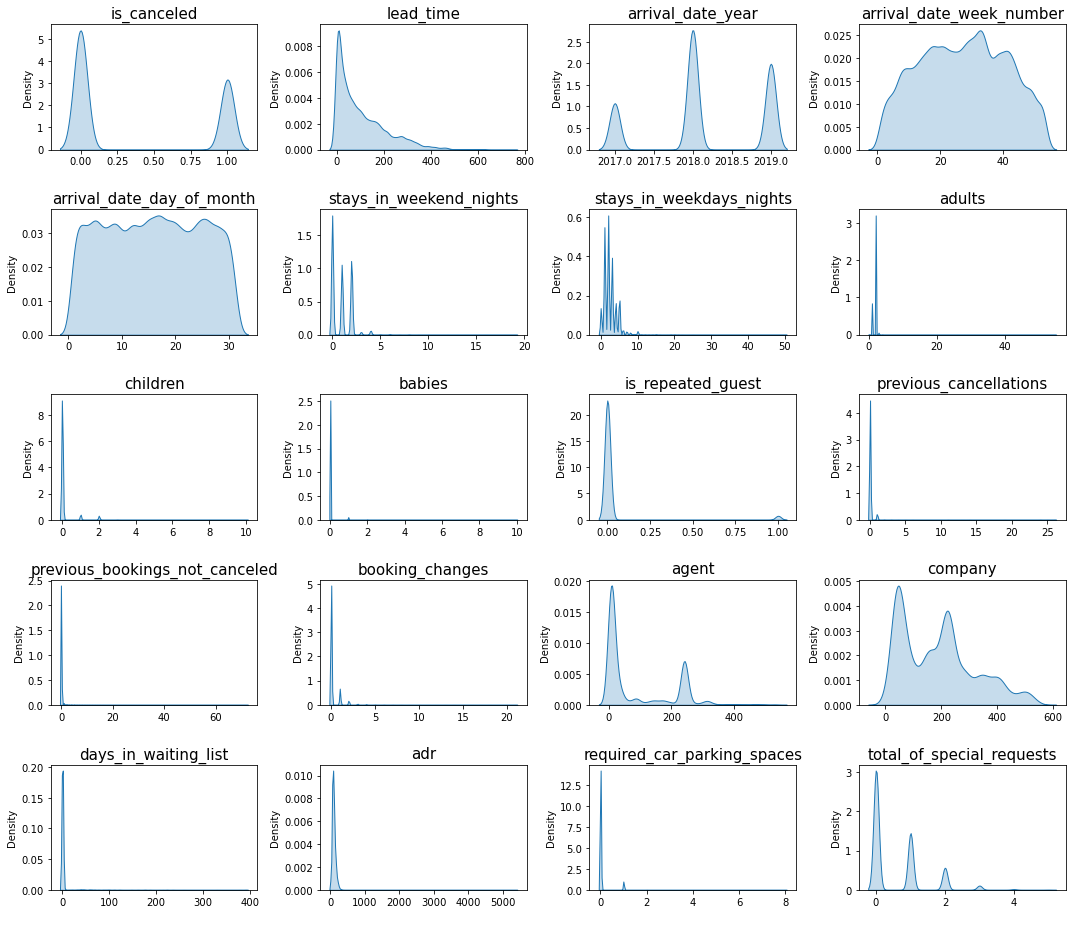

In [7]:
plt.figure(figsize=(15,13))
for i in range(0, len(num)):
    plt.subplot(5,4,i+1)
    sns.kdeplot(x=eda[num[i]], palette='viridis', shade=True)
    plt.title(num[i], fontsize=15)
    plt.xlabel(' ')
    plt.tight_layout()

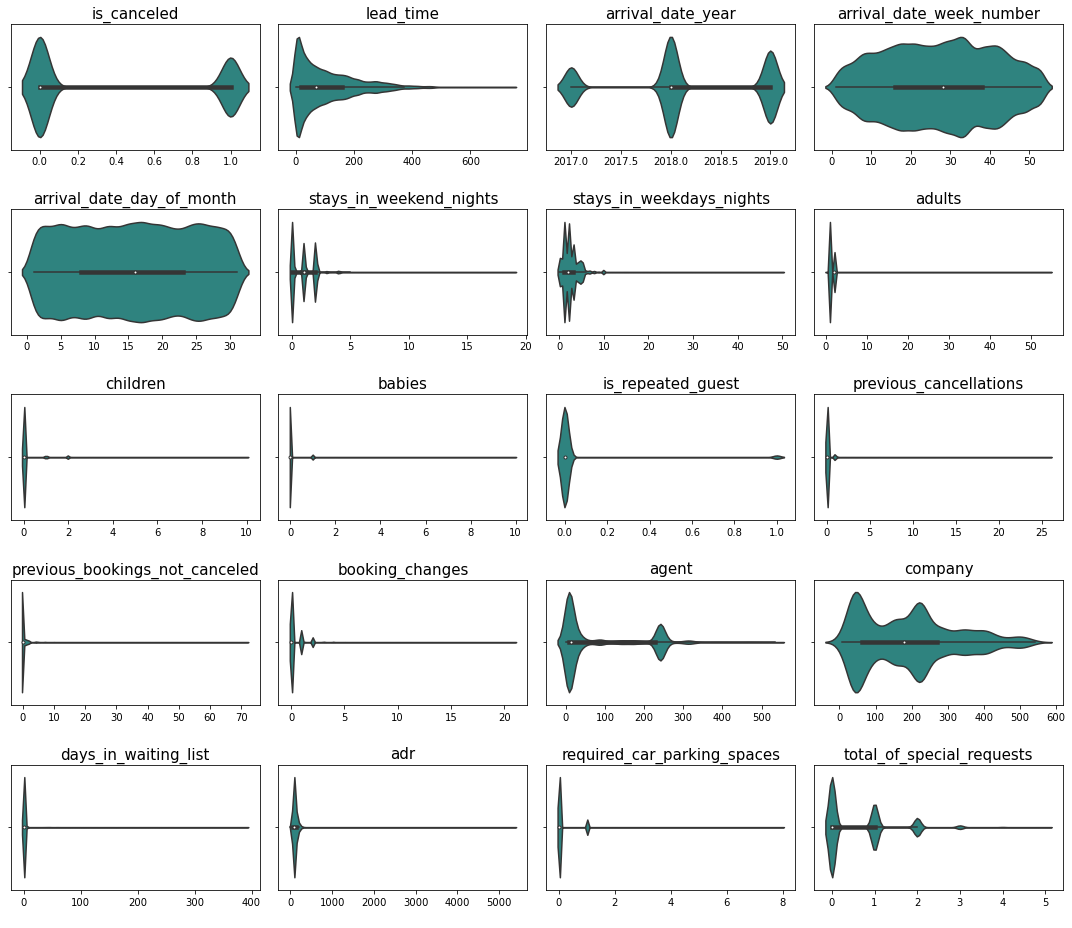

In [9]:
plt.figure(figsize=(15,13))
for i in range(0, len(num)):
    plt.subplot(5,4,i+1)
    sns.violinplot(x=eda[num[i]], palette='viridis', shade=True)
    plt.title(num[i], fontsize=15)
    plt.xlabel(' ')
    plt.tight_layout()

In [6]:
len(cat)

9

In [16]:
eda[cat].nunique()

hotel                     2
arrival_date_month       12
meal                      5
city                    177
market_segment            8
distribution_channel      5
deposit_type              3
customer_type             4
reservation_status        3
dtype: int64

In [17]:
# drop city, too many unique values in there
cat = cat.drop('city')
cat

Index(['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'deposit_type', 'customer_type',
       'reservation_status'],
      dtype='object')

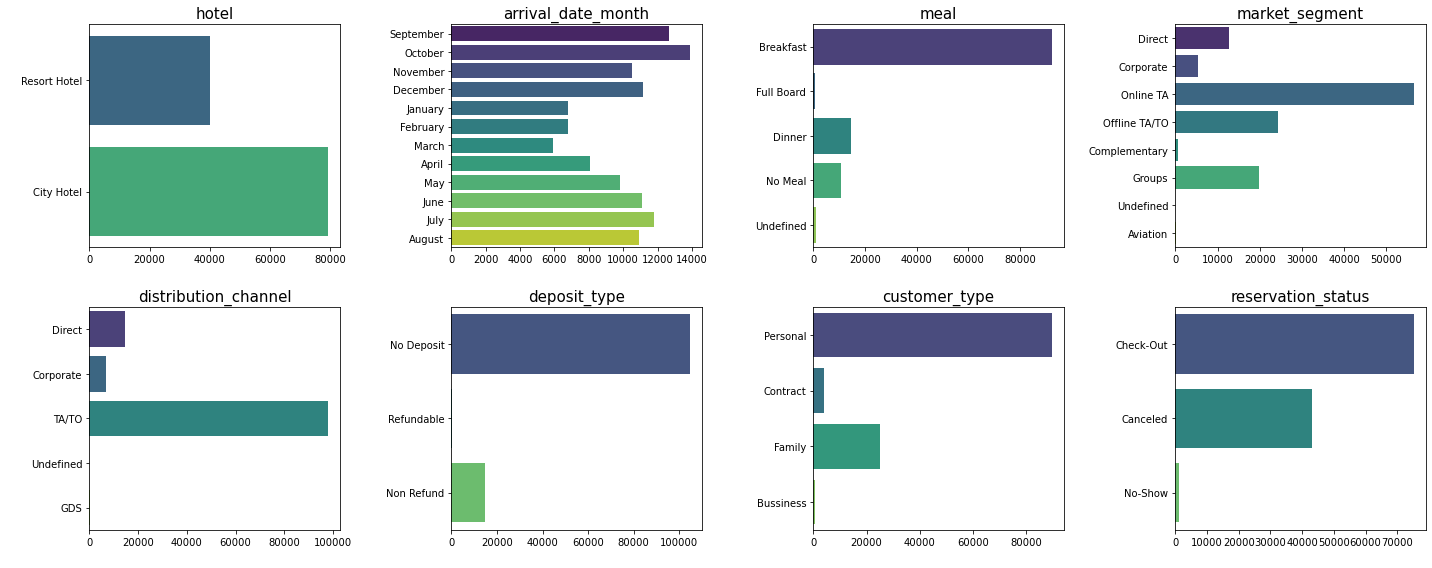

In [22]:
plt.figure(figsize=(20,8))
for i in range(0, len(cat)):
    plt.subplot(2,4,i+1)
    sns.countplot(y=eda[cat[i]], palette='viridis')
    plt.title(cat[i], fontsize=15)
    plt.xlabel(' ')
    plt.ylabel(' ')
    plt.tight_layout()

## Bivariate Analysis

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


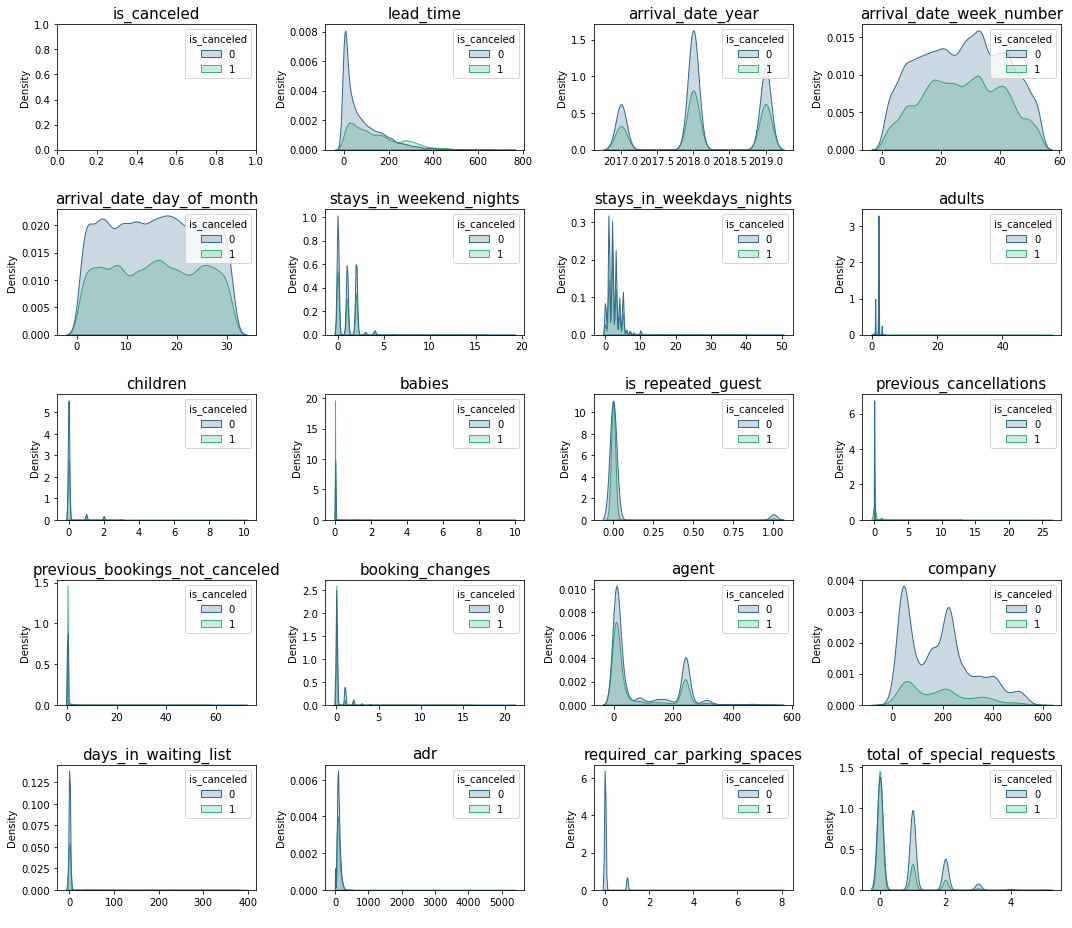

In [10]:
plt.figure(figsize=(15,13))
for i in range(0, len(num)):
    plt.subplot(5,4,i+1)
    sns.kdeplot(x=eda[num[i]], palette='viridis', shade=True, hue=eda['is_canceled'])
    plt.title(num[i], fontsize=15)
    plt.xlabel(' ')
    plt.tight_layout()

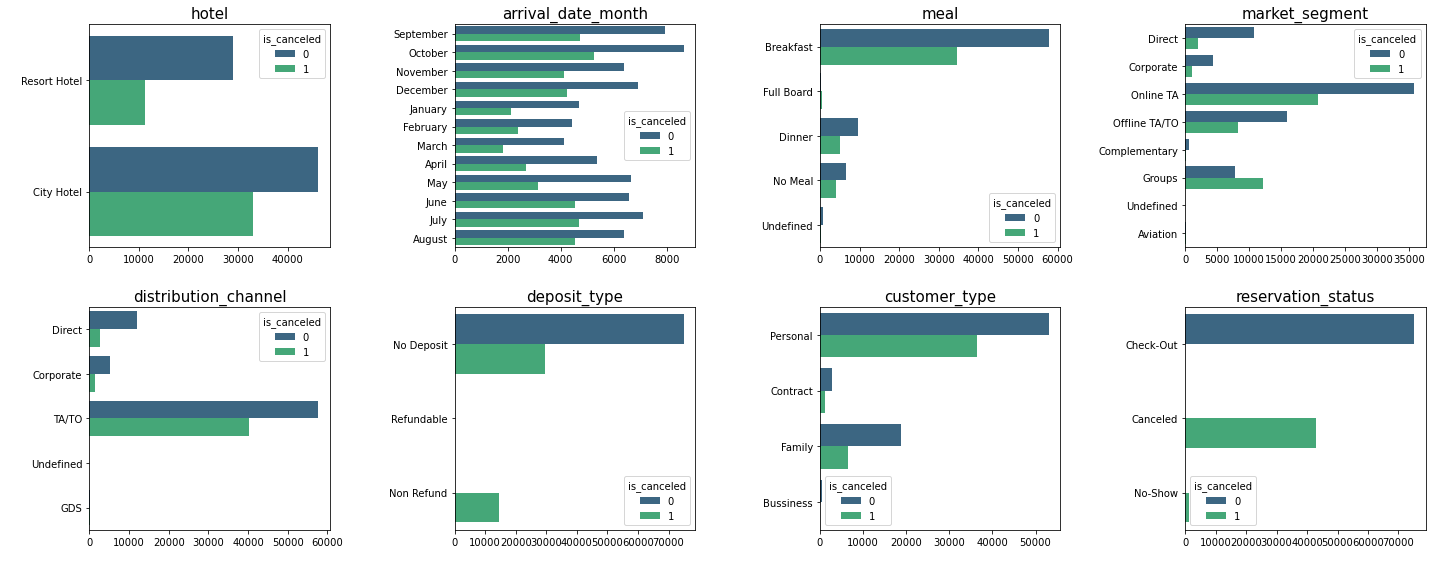

In [23]:
plt.figure(figsize=(20,8))
for i in range(0, len(cat)):
    plt.subplot(2,4,i+1)
    sns.countplot(y=eda[cat[i]], palette='viridis', hue=eda['is_canceled'])
    plt.title(cat[i], fontsize=15)
    plt.xlabel(' ')
    plt.ylabel(' ')
    plt.tight_layout()

## Correlation Heatmap

<AxesSubplot:>

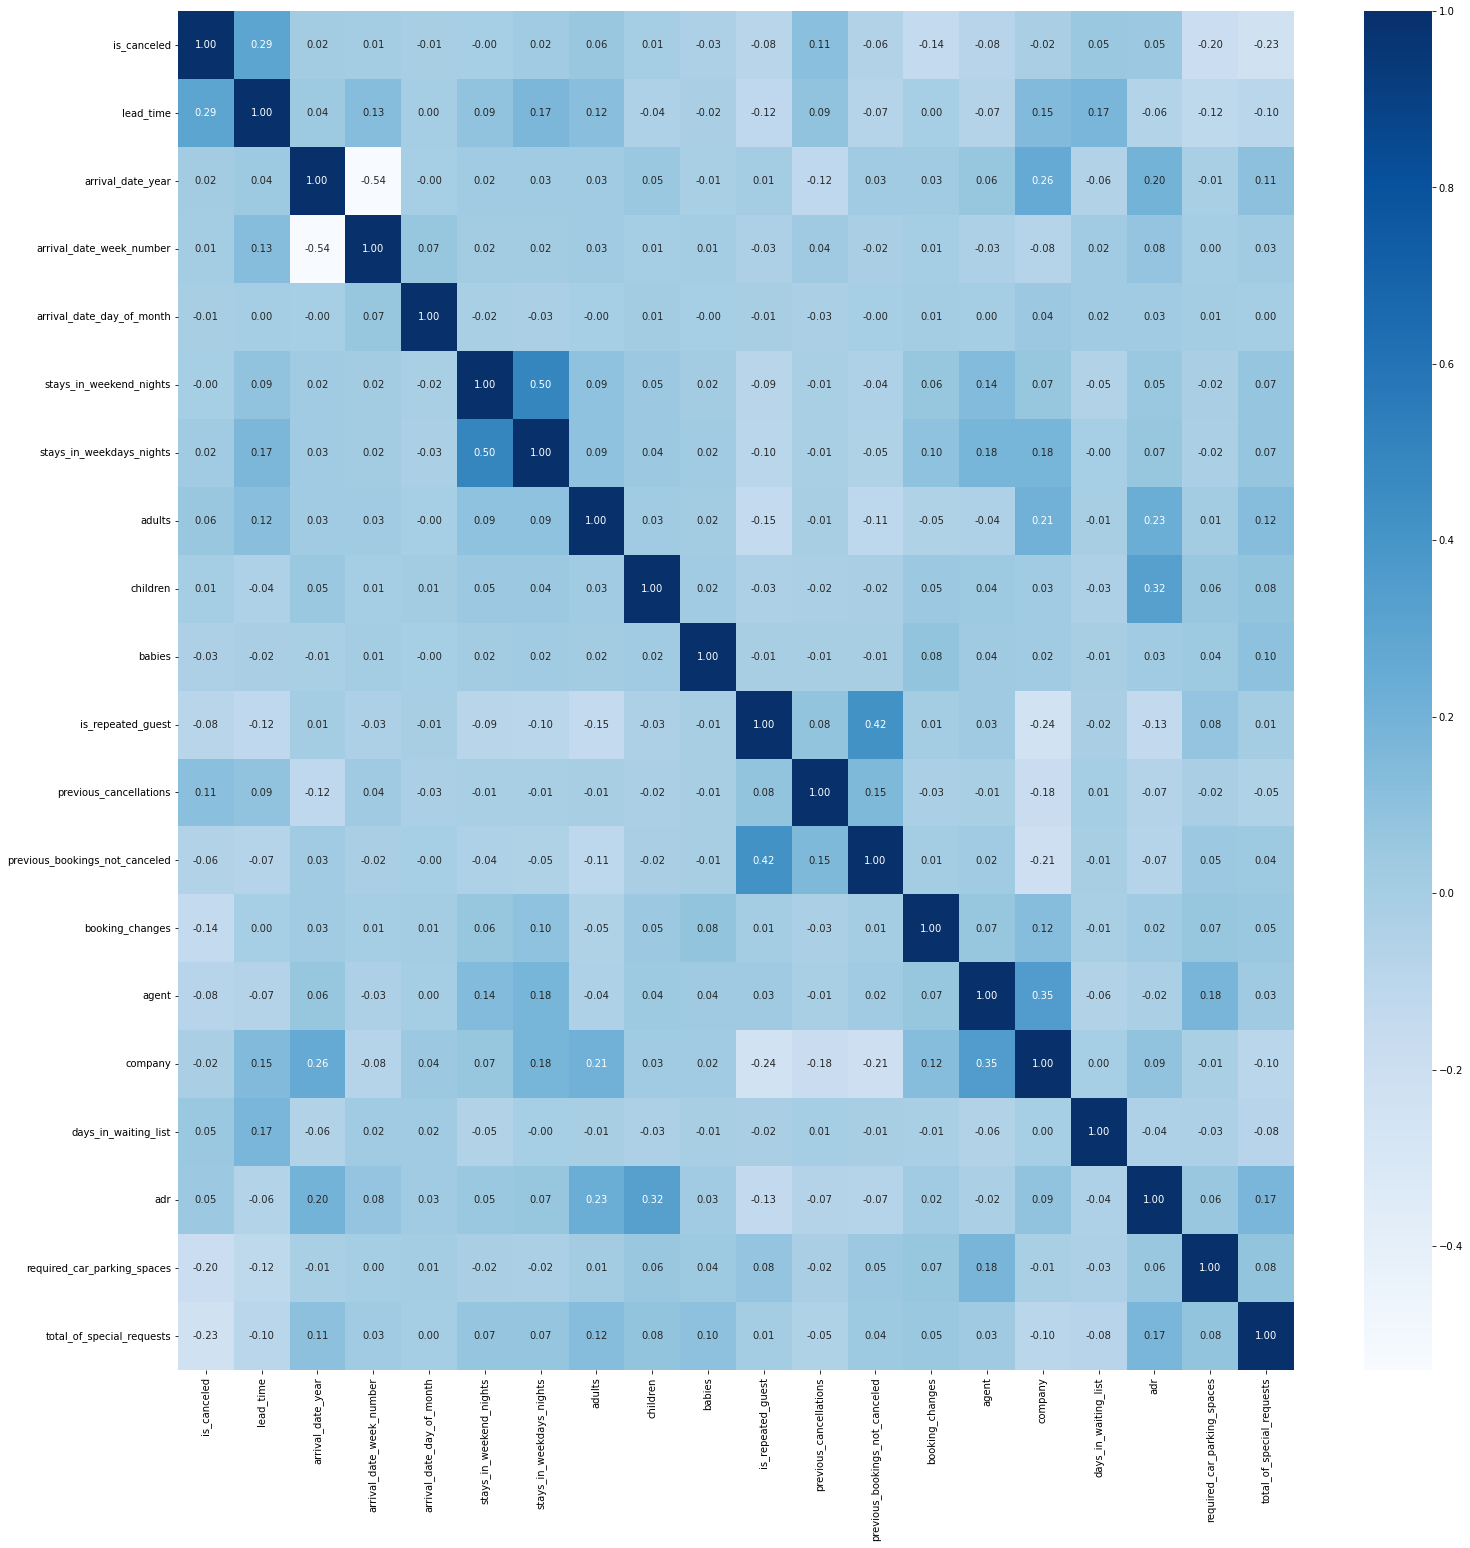

In [29]:
# Create Heatmap Correlation Chart for Each Numerical Features

plt.figure(figsize=(25, 25))
sns.heatmap(eda.corr(), cmap='Blues', annot=True, fmt='.2f')

# Data Preprocessing

## Handling Missing Values

In [35]:
round(df.isnull().sum()/len(df),5)

hotel                             0.00000
is_canceled                       0.00000
lead_time                         0.00000
arrival_date_year                 0.00000
arrival_date_month                0.00000
arrival_date_week_number          0.00000
arrival_date_day_of_month         0.00000
stays_in_weekend_nights           0.00000
stays_in_weekdays_nights          0.00000
adults                            0.00000
children                          0.00003
babies                            0.00000
meal                              0.00000
city                              0.00409
market_segment                    0.00000
distribution_channel              0.00000
is_repeated_guest                 0.00000
previous_cancellations            0.00000
previous_bookings_not_canceled    0.00000
booking_changes                   0.00000
deposit_type                      0.00000
agent                             0.13686
company                           0.94307
days_in_waiting_list              

* we will impute `children` with median or 0 (it's the same values in this case)
* we will impute `city` with unknown because we don't know what the missing city belongs to
* we will impute `agent` with median
* we will impute `company` with 0 because it means it's individual booking

In [55]:
df['children'] = df['children'] .fillna(df['children'].median())
df['city'] = df['city'].fillna('unknown')
df['agent'] = df['agent'].fillna(df['agent'].median())
df['company'] = df['company'].fillna(0) 

In [56]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

## Formating Wrong Data Types

In [58]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_weekdays_nights            int64
adults                              int64
children                          float64
babies                              int64
meal                               object
city                               object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
booking_changes                     int64
deposit_type                       object
agent                             float64
company                           float64
days_in_waiting_list              

Change data types from float to integer for `children`, `agent`, and `company` features.

In [59]:
col = ['children', 'agent', 'company']
for i in col:
    df[i] = df[i].astype(int)
    
df[col].dtypes

children    int64
agent       int64
company     int64
dtype: object

## Feature Engineering : `Meal` Feature

In [61]:
df['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: meal, dtype: int64

In [64]:
df['meal'] = np.where(df['meal'] == 'Undefined','No Meal', df['meal'])
df['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       11819
Full Board      798
Name: meal, dtype: int64

## Filter Unreliable Rows

In [71]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']
df['total_stays'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']

print('Number of 0 guest :', df[df['total_guests'] == 0].shape[0])
print('Number of 0 stay :', df[df['total_stays'] == 0].shape[0])
print('\n')

# filter the data
print('number of rows before filtering :', df.shape[0])
df = df[(df['total_guests']>0) & (df['total_stays']>0)]
print('number of rows after filtering :', df.shape[0])

Number of 0 guest : 180
Number of 0 stay : 715


number of rows before filtering : 119390
number of rows after filtering : 118565


# Data Insights

In [69]:
df_clean['total_guests'] = df_clean['adults'] + df_clean['children'] + df_clean['babies']
print('Data with 0 guest: {0} out of {1} all data'.format(df_clean[df_clean['total_guests'] == 0].shape[0], df_clean.shape[0]))
df_clean['stay_duration'] = df_clean['stays_in_weekend_nights'] + df_clean['stays_in_weekdays_nights']
print('Data with 0 night: {0} out of {1} all data'.format(df_clean[df_clean['stay_duration'] == 0].shape[0], df_clean.shape[0]))

# Pick the necessary data
df_clean_fix = df_clean[(df_clean['total_guests'] > 0) & (df_clean['stay_duration'] > 0)]

print('before pre-processing:', df_clean.shape[0])
print('after pre-processing:', df_clean_fix.shape[0])

Data with 0 guest: 180 out of 119390 all data
Data with 0 night: 715 out of 119390 all data
before pre-processing: 119390
after pre-processing: 118565


## Monthly Booking Analysis

In [72]:
df.groupby(['hotel', 'arrival_date_month', 'arrival_date_year']).agg({'is_canceled':'count'})

is_canceled
hotel        arrival_date_month arrival_date_year             
City Hotel   April              2018                      2347
                                2019                      2570
             August             2018                      3914
                                2019                      3960
             December           2017                      3368
                                2018                      4186
             February           2017                      1637
                                2018                      2460
             January            2017                      1225
                                2018                      3084
             July               2018                      3640
                                2019                      4544
             June               2018                      3549
                                2019                      3909
             March              2018                      1355
                                2019                      2357
             May                2018                      3028
                                2019                      3383
             November           2017                      3516
                                2018                      3861
             October            2017                      2471
                                2018                      3362
                                2019                      3119
             September          2017                      1393
                                2018                      3107
                                2019                      3554
Resort Hotel April              2018                      1509
                                2019                      1572
             August             2018                      1345
                                2019                      1672
             December           2017                      1548
                                2018                      1962
             February           2017                      1239
                                2018                      1353
             January            2017                      1088
                                2018                      1315
             July               2018                      1773
                                2019                      1747
             June               2018                      1848
                                2019                      1739
             March              2018                       866
                                2019                      1293
             May                2018                      1754
                                2019                      1551
             November           2017                      1582
                                2018                      1518
             October            2017                      1392
                                2018                      1672
                                2019                      1796
             September          2017                      1361
                                2018                      1427
                                2019                      1744

Because we data start recorded from september 2017, so we will take average to count number of booking

In [114]:
df_groupby = df.groupby(['hotel','arrival_date_month'])['arrival_date_year'].agg(['nunique','count']).reset_index()
df_groupby.columns = ['hotel_type','month','year_count','total_booking']
df_groupby

,hotel_type,month,year_count,total_booking
0,City Hotel,April,2,4917
1,City Hotel,August,2,7874
2,City Hotel,December,2,7554
3,City Hotel,February,2,4097
4,City Hotel,January,2,4309
5,City Hotel,July,2,8184
6,City Hotel,June,2,7458
7,City Hotel,March,2,3712
8,City Hotel,May,2,6411
9,City Hotel,November,2,7377


In [115]:
# average booking / year
df_groupby['avg_total_booking'] = round(df_groupby['total_booking']/df_groupby['year_count'])
df_groupby['avg_total_booking'] = df_groupby['avg_total_booking'].astype(int)
df_groupby

,hotel_type,month,year_count,total_booking,avg_total_booking
0,City Hotel,April,2,4917,2458
1,City Hotel,August,2,7874,3937
2,City Hotel,December,2,7554,3777
3,City Hotel,February,2,4097,2048
4,City Hotel,January,2,4309,2154
5,City Hotel,July,2,8184,4092
6,City Hotel,June,2,7458,3729
7,City Hotel,March,2,3712,1856
8,City Hotel,May,2,6411,3206
9,City Hotel,November,2,7377,3688


In [116]:
df_groupby['month'] = df_groupby['month'].str[:3]
df_groupby

,hotel_type,month,year_count,total_booking,avg_total_booking
0,City Hotel,Apr,2,4917,2458
1,City Hotel,Aug,2,7874,3937
2,City Hotel,Dec,2,7554,3777
3,City Hotel,Feb,2,4097,2048
4,City Hotel,Jan,2,4309,2154
5,City Hotel,Jul,2,8184,4092
6,City Hotel,Jun,2,7458,3729
7,City Hotel,Mar,2,3712,1856
8,City Hotel,May,2,6411,3206
9,City Hotel,Nov,2,7377,3688


In [180]:
city = df_groupby[df_groupby['hotel_type']=='City Hotel']
city['pct_total_booking'] = round(city['avg_total_booking']/city['avg_total_booking'].sum(),3)

resort = df_groupby[df_groupby['hotel_type']=='Resort Hotel']
resort['pct_total_booking'] = round(resort['avg_total_booking']/resort['avg_total_booking'].sum(),3)

df_groupby = city.append(resort)
df_groupby

,hotel_type,month,year_count,total_booking,avg_total_booking,pct_total_booking
0,City Hotel,Apr,2,4917,2458,0.067
1,City Hotel,Aug,2,7874,3937,0.108
2,City Hotel,Dec,2,7554,3777,0.103
3,City Hotel,Feb,2,4097,2048,0.056
4,City Hotel,Jan,2,4309,2154,0.059
5,City Hotel,Jul,2,8184,4092,0.112
6,City Hotel,Jun,2,7458,3729,0.102
7,City Hotel,Mar,2,3712,1856,0.051
8,City Hotel,May,2,6411,3206,0.088
9,City Hotel,Nov,2,7377,3688,0.101


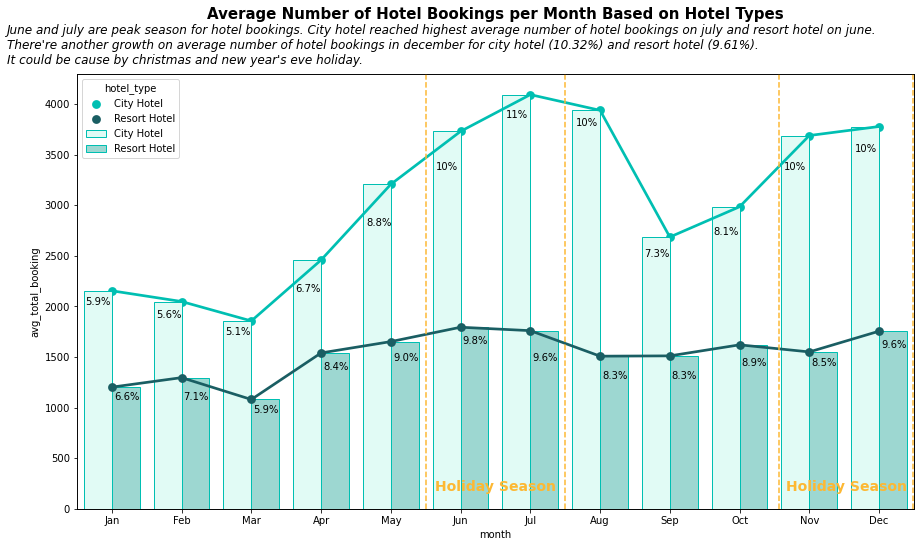

In [335]:
import matplotlib.ticker as ticker
pal = ['#ddfff7', '#93e1d8']
pal2 = ['#00bfb2', '#1a5e63']
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, ax1 = plt.subplots(figsize=(15,8))

plt.title("Average Number of Hotel Bookings per Month Based on Hotel Types", fontsize=15, color='black', weight='bold', pad=55)
plt.text(x=-1.5, y=4400, s="June and july are peak season for hotel bookings. City hotel reached highest average number of hotel bookings on july and resort hotel on june.\nThere're another growth on average number of hotel bookings in december for city hotel (10.32%) and resort hotel (9.61%).\nIt could be cause by christmas and new year's eve holiday.", fontsize=12, fontstyle='italic')

sns.pointplot(x='month', y='avg_total_booking', edgecolor='#00bfb2',
            data=df_groupby, hue='hotel_type', palette=pal2, ax=ax1,
            order=month_order)

ax2 = ax1.twinx()

sns.barplot(x='month', y='avg_total_booking', 
            data=df_groupby, hue='hotel_type', edgecolor='#00bfb2', 
            palette=pal, order=month_order, ax=ax1)

ax2.yaxis.set_major_locator(ticker.NullLocator())


# plt text Jan
plt.text(x=-0.38,y=0.47,s='5.9%')
plt.text(x=0.03,y=0.25,s='6.6%')
# plt text Feb
plt.text(x=0.63,y=0.44,s='5.6%')
plt.text(x=1.03,y=0.25,s='7.1%')
# plt text Mar
plt.text(x=1.63,y=0.40,s='5.1%')
plt.text(x=2.03,y=0.22,s='5.9%')
# plt text April
plt.text(x=2.63,y=0.50,s='6.7%')
plt.text(x=3.04,y=0.32,s='8.4%')
# plt text May
plt.text(x=3.65,y=0.65,s='8.8%')
plt.text(x=4.03,y=0.34,s='9.0%')
# plt text June
plt.text(x=4.65,y=0.78,s='10%')
plt.text(x=5.03,y=0.38,s='9.8%')

plt.axvline(4.5, ls='--', color='#fdb833')
plt.axvline(6.5, ls='--', color='#fdb833')
plt.text(x=4.63, y=0.05, s='Holiday Season', fontsize=14, color='#fdb833', va='center', weight='extra bold')

# plt text July
plt.text(x=5.65,y=0.9,s='11%')
plt.text(x=6.03,y=0.34,s='9.6%')
# plt text August
plt.text(x=6.65,y=0.88,s='10%')
plt.text(x=7.04,y=0.3,s='8.3%')
# plt text September
plt.text(x=7.63,y=0.58,s='7.3%')
plt.text(x=8.02,y=0.3,s='8.3%')
# plt text October
plt.text(x=8.62,y=0.63,s='8.1%')
plt.text(x=9.02,y=0.33,s='8.9%')
# plt text November
plt.text(x=9.64,y=0.78,s='10%')
plt.text(x=10.03,y=0.33,s='8.5%')

plt.axvline(9.56, ls='--', color='#fdb833')
plt.axvline(11.48, ls='--', color='#fdb833')
plt.text(x=9.66, y=0.05, s='Holiday Season', fontsize=14, color='#fdb833', va='center', weight='extra bold')

# plt text December
plt.text(x=10.65,y=0.82,s='10%')
plt.text(x=11.03,y=0.37,s='9.6%')

plt.savefig('abcde task2')

## Impact Analysis of Stay Duration on Cancelation Rates


In [337]:
df['total_stays'].value_counts()

2     27632
3     27064
1     21005
4     17373
7      8648
5      7771
6      3846
8      1155
10     1135
14      913
9       840
11      393
12      220
13      141
15       72
21       71
16       40
25       37
18       35
28       34
19       22
17       20
20       14
22       13
29       13
30       13
23        8
26        6
24        6
35        5
42        4
27        4
33        3
56        2
38        1
48        1
46        1
45        1
69        1
60        1
34        1
Name: total_stays, dtype: int64

In [338]:
duration_list = []
for i in df['total_stays']:
    if i >= 1 and i <= 7:
        group = '1 Week'
    elif i >= 8 and i <= 14:
        group = '2 Weeks'
    elif i >= 15 and i <= 21:
        group = '3 Weeks'
    else: 
        group = '4 Weeks'
    duration_list.append(group)
df['stay_duration_group'] = duration_list
df['stay_duration_group'].value_counts()

1 Week     113339
2 Weeks      4797
3 Weeks       274
4 Weeks       155
Name: stay_duration_group, dtype: int64

In [339]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,total_stays,stay_duration_group
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,14,0,0,Personal,75.0,0,0,Check-Out,1,1,1 Week
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304,0,0,Personal,75.0,0,0,Check-Out,1,1,1 Week
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,0,Personal,98.0,0,1,Check-Out,2,2,1 Week
5,Resort Hotel,0,14,2017,September,27,1,0,2,2,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,0,Personal,98.0,0,1,Check-Out,2,2,1 Week
6,Resort Hotel,0,0,2017,September,27,1,0,2,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,14,0,0,Personal,107.0,0,0,Check-Out,2,2,1 Week


In [341]:
df_gb3 = df.groupby(['hotel', 'stay_duration_group', 'is_canceled']).agg({'agent':'count'}).reset_index()
df_gb3.rename(columns={'agent':'num_booking'}, inplace=True)

#create sum booking column
df_sum = df_gb3.groupby(['hotel', 'stay_duration_group']).agg({'num_booking':'sum'}).reset_index()
df_sum.rename(columns={'num_booking':'sum_booking'}, inplace=True)
df_gb3 = df_gb3.merge(df_sum, on=['hotel', 'stay_duration_group'])

#create cancellation rate
df_gb3['cancellation_rate'] = round((df_gb3['num_booking']/df_gb3['sum_booking'])*100, 2)
df_gb3

,hotel,stay_duration_group,is_canceled,num_booking,sum_booking,cancellation_rate
0,City Hotel,1 Week,0,45287,77678,58.30
1,City Hotel,1 Week,1,32391,77678,41.70
2,City Hotel,2 Weeks,0,511,1069,47.80
3,City Hotel,2 Weeks,1,558,1069,52.20
4,City Hotel,3 Weeks,0,29,105,27.62
5,City Hotel,3 Weeks,1,76,105,72.38
6,City Hotel,4 Weeks,0,6,47,12.77
7,City Hotel,4 Weeks,1,41,47,87.23
8,Resort Hotel,1 Week,0,25754,35661,72.22
9,Resort Hotel,1 Week,1,9907,35661,27.78


In [342]:
#filter the data that hotels has been cancelled
df_gb = df_gb3[df_gb3['is_canceled']==1].sort_values('stay_duration_group', ascending=True)
df_gb

,hotel,stay_duration_group,is_canceled,num_booking,sum_booking,cancellation_rate
1,City Hotel,1 Week,1,32391,77678,41.70
9,Resort Hotel,1 Week,1,9907,35661,27.78
3,City Hotel,2 Weeks,1,558,1069,52.20
11,Resort Hotel,2 Weeks,1,1078,3728,28.92
5,City Hotel,3 Weeks,1,76,105,72.38
13,Resort Hotel,3 Weeks,1,79,169,46.75
7,City Hotel,4 Weeks,1,41,47,87.23
15,Resort Hotel,4 Weeks,1,46,108,42.59


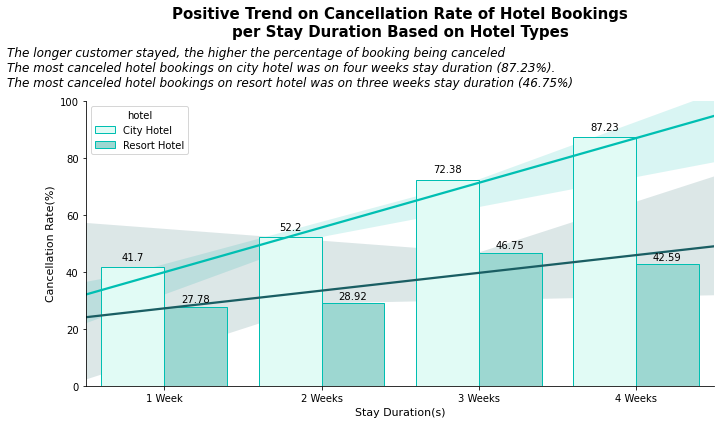

In [352]:
pal = ['#ddfff7', '#93e1d8']
pal2 = ['#00bfb2', '#1a5e63']

fig, ax = plt.subplots(figsize=(10, 6))
plt.title("Positive Trend on Cancellation Rate of Hotel Bookings\nper Stay Duration Based on Hotel Types", fontsize=15, color='black', weight='bold', pad=65)
plt.text(x=-1, y=105, s="The longer customer stayed, the higher the percentage of booking being canceled\nThe most canceled hotel bookings on city hotel was on four weeks stay duration (87.23%).\nThe most canceled hotel bookings on resort hotel was on three weeks stay duration (46.75%)", fontsize=12, fontstyle='italic')
sns.barplot(x='stay_duration_group', y='cancellation_rate', data=df_gb, hue='hotel', edgecolor='#00bfb2', palette=pal)

sns.regplot(x=np.arange(0, len(df_gb[df_gb['hotel'] == 'City Hotel'])), y='cancellation_rate', color='#00bfb2',
            data=df_gb[df_gb['hotel'] == 'City Hotel'], scatter=False, label = 'Trend City Hotel', truncate=False)
sns.regplot(x=np.arange(0, len(df_gb[df_gb['hotel'] == 'City Hotel'])), y='cancellation_rate', color='#1a5e63',
            data=df_gb[df_gb['hotel'] == 'Resort Hotel'], scatter=False, label='Trend Resort Hotel', truncate=False)

plt.xlabel('Stay Duration(s)', fontsize=11)
plt.ylabel('Cancellation Rate(%)', fontsize=11)
plt.ylim(0, 100)

plt.bar_label(ax.containers[0], padding=5)
plt.bar_label(ax.containers[1], padding=2)

sns.despine()
plt.tight_layout()
plt.savefig('cancelrate_stayduration.png', dpi=200)

## Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate

In [355]:
df['lead_time'].value_counts()

0      6007
1      3386
2      2042
3      1804
4      1697
       ... 
389       1
387       1
400       1
370       1
463       1
Name: lead_time, Length: 478, dtype: int64

<AxesSubplot:xlabel='lead_time', ylabel='Count'>

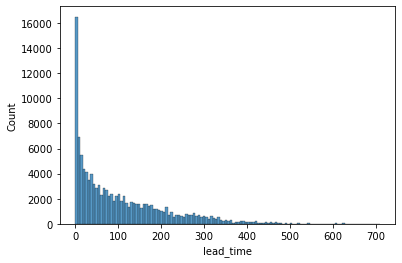

In [356]:
sns.histplot(df['lead_time'])

In [358]:
lead_time_list=[]
for i in df['lead_time']:
    if i <= 30:
        lead_group = '1 Month'
    elif i >= 31 and i <= 120:
        lead_group = '2-4 Months'
    elif i >= 121 and i <= 210:
        lead_group = '5-7 Months'
    elif i >= 211 and i <= 300:
        lead_group = '8-10 Months'
    elif i >= 311 and i <= 360:
        lead_group = '11-12 Months'
    else: 
        lead_group = '>12 Months'
    lead_time_list.append(lead_group)
df['lead_time_group'] = lead_time_list
df['lead_time_group'].value_counts()

2-4 Months      39851
1 Month         38094
5-7 Months      21619
8-10 Months     11122
>12 Months       4465
11-12 Months     3414
Name: lead_time_group, dtype: int64

In [360]:
df4 = df.groupby(['hotel', 'lead_time_group', 'is_canceled']).agg({'agent':'count'}).reset_index()
df4.rename(columns={'agent':'num_booking'}, inplace=True)

# create sum booking column
df_sum = df4.groupby(['hotel', 'lead_time_group']).agg({'num_booking':'sum'}).reset_index()
df_sum.rename(columns={'num_booking':'sum_booking'}, inplace=True)
df4 = df4.merge(df_sum, on=['hotel', 'lead_time_group'])

# create cancellation rate
df4['cancelation_rate'] = round((df4['num_booking']/df4['sum_booking'])*100, 2)

# filter the data that hotels has been cancelled
df_4 = df4[df4['is_canceled']==1]
df_4

,hotel,lead_time_group,is_canceled,num_booking,sum_booking,cancelation_rate
1,City Hotel,1 Month,1,5174,23022,22.47
3,City Hotel,11-12 Months,1,1940,2506,77.41
5,City Hotel,2-4 Months,1,11783,28189,41.80
7,City Hotel,5-7 Months,1,7051,14349,49.14
9,City Hotel,8-10 Months,1,4376,7136,61.32
11,City Hotel,>12 Months,1,2742,3697,74.17
13,Resort Hotel,1 Month,1,1976,15072,13.11
15,Resort Hotel,11-12 Months,1,395,908,43.50
17,Resort Hotel,2-4 Months,1,3999,11662,34.29
19,Resort Hotel,5-7 Months,1,2685,7270,36.93


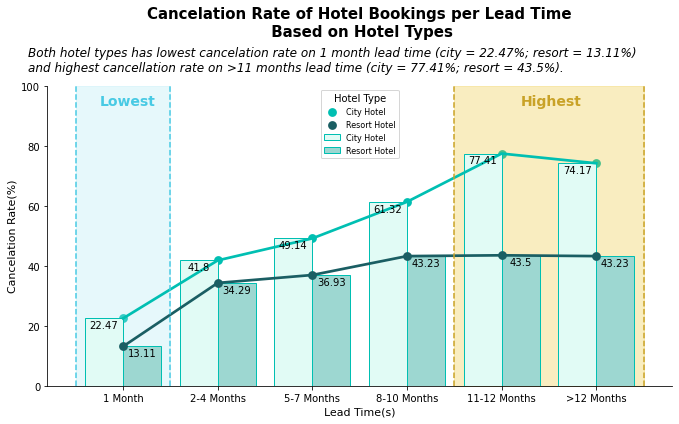

In [386]:
pal = ['#ddfff7', '#93e1d8']
pal2 = ['#00bfb2', '#1a5e63']
order = ['1 Month', '2-4 Months', '5-7 Months', '8-10 Months', '11-12 Months', '>12 Months']

fig, ax = plt.subplots(figsize=(10, 6))
plt.title("Cancelation Rate of Hotel Bookings per Lead Time\n Based on Hotel Types", fontsize=15, color='black', weight='bold', pad=50)
plt.text(x=-1, y=105, s="Both hotel types has lowest cancelation rate on 1 month lead time (city = 22.47%; resort = 13.11%)\nand highest cancellation rate on >11 months lead time (city = 77.41%; resort = 43.5%).", fontsize=12, fontstyle='italic')

sns.pointplot(x='lead_time_group', y='cancelation_rate', data=df_4, 
              hue='hotel', order=order, edgecolor='#00bfb2', palette=pal2)

sns.barplot(x='lead_time_group', y='cancelation_rate', data=df_4, 
            hue='hotel', order=order, edgecolor='#00bfb2', palette=pal)

plt.xlabel('Lead Time(s)', fontsize=11)
plt.ylabel('Cancelation Rate(%)', fontsize=11)
plt.ylim(0, 100)

plt.bar_label(ax.containers[0], padding=-12)
plt.bar_label(ax.containers[1], padding=-12)

plt.axvline(3.5, ls='--', color='#c9a227')
plt.axvline(5.5, ls='--', color='#c9a227')
plt.stackplot(np.arange(3.5,6.5), [[100]], color='#edc531', alpha=0.3)
plt.text(x=4.2, y=95, s='Highest', fontsize=14, color='#c9a227', va='center', weight='extra bold')

plt.axvline(0.5, ls='--', color='#48cae4')
plt.axvline(-0.5, ls='--', color='#48cae4')
plt.stackplot(np.arange(-0.5,1.5), [[100]], color='#ade8f4', alpha=0.3)
plt.text(x=-0.25, y=95, s='Lowest', fontsize=14, color='#48cae4', va='center', weight='extra bold')

plt.legend(title='Hotel Type', prop={'size':8}, loc='upper center')

sns.despine()
plt.tight_layout()
plt.savefig('cancelrate_leadtime.png', dpi=200)